> **Confidence interval** is uncertainty in summary statistic represented as a range. In the other words, it is a range of values we are fairly sure our true value lies in. For example: I am 95% confident that the population mean falls between 8.76 and 15.88 $\rightarrow$ (12.32 $\pm$ 3.56)

Confidence interval tells you how confident you can be that the results from a poll or survey reflect what you would expect to find if it were possible to survey the entire population. It is difficult to obtain measurement data of an entire data set (*population*) due to limited resource & time. Your best shot is to survey a small fraction (*samples*) of the entire data set, and pray that your sample data represents the population reasonably well. 

Sample data may not be a good representation of a population by numerous factors (Ex: bias), and as a result, uncertainty is always introduced in any estimations derived from sample data. **Due to the uncertainty involved with sample data, any statistical estimation needs to be delivered in a range, not in a point estimate**.

How well a sample statistic estimates an underlying population parameter is always an issue (<a href="#population_vs_samples">Population vs. Samples</a>). A confidence interval addresses this issue by providing a range of values, which is likely to contain the population parameter of interest.

<div id="toc_container">
    <p class="toc_title">Contents</p>
    <ul class="toc_list">
        <li>
            <a href="#Understanding confidence interval with analogy"><span class="toc_label">1</span>Understanding
                confidence interval with analogy</a>
            <ul>
                <li><a href="#Uncertainty in rock porosity"><span class="toc_label">Example 1:</span>Uncertainty in rock
                    porosity</a></li>
                <li><a href="#Purity of methamphetamine (crystal) in Breaking Bad"><span
                        class="toc_label">Example 2:</span>Purity of methamphetamine (crystal) in Breaking Bad</a></li>
            </ul>
        </li>
        <li><a href="#quick-highlights"><span class="toc_label">2</span>Quick highlights of confidence interval</a></li>
        <li><a href="#population_vs_samples"><span class="toc_label">3</span>Population vs Samples</a></li>
        <ul>
            <li><a href="#sample_pop_var"><span class="toc_label">Notes:</span>Population variance ($\sigma^2$) vs.
                Sample variance ($s^2$)</a></li>
            <li><a href="#python_variance"><span class="toc_label">Pythonic Tip:</span>Difference between Numpy variance
                and Pandas variance</a></li>
        </ul>
        <li><a href="#Confidence interval of different statistics"><span class="toc_label">4</span>Confidence interval
            of normal distribution</a></li>
        <ul>
            <li><a href="#conf_int_of_mean"><span class="toc_label">4.1</span>Confidence interval of mean</a></li>
            <ul>
                <li><a href="#dist_stats"><span class="toc_label">Notes:</span>Distribution of various statistics</a>
                </li>
                <li><a href="#t_vs_z"><span class="toc_label">Notes:</span>z-score vs t-score</a></li>
                <li><a href="#python_ci_mean"><span class="toc_label">Pythonic Tip:</span>Computing confidence interval of mean with SciPy</a></li>
            </ul>
            <li><a href="#conf_int_of_diff_in_mean"><span class="toc_label">4.2</span>Confidence interval of difference
                in mean</a></li>
            <ul>
                <li><a href="#ind_equal"><span class="toc_label">4.2.1</span>Independent (unpaired) samples, equal
                    variance - Student's t-interval</a></li>
                <ul>
                    <li><a href="#python_ind_equal"><span class="toc_label">Pythonic Tip:</span>Computing student's t-interval</a></li>
                </ul>
                <li><a href="#ind_unequal"><span class="toc_label">4.2.2</span>Independent (unpaired) samples, unequal variance - Welch's t-interval</a></li>
                <ul>
                    <li><a href="#python_ind_unequal"><span class="toc_label">Pythonic Tip:</span>Computing Welch's t-interval</a></li>
                </ul>
                <li><a href="#dep"><span class="toc_label">4.2.3</span>Dependent (paired) samples - Paired t-interval</a></li>
                <ul>
                    <li><a href="#python_dep"><span class="toc_label">Pythonic Tip:</span>Computing paired t-interval</a></li>
                </ul>
                <li><a href="#which_to_use"><span class="toc_label">Notes:</span>Deciding which t-test to use</a></li>
                <li><a href="#very_large"><span class="toc_label">Notes:</span>Hypothesis testing can be useless when
                    sample size is very large</a></li>
            </ul>
            <li><a href="#conf_int_of_var"><span class="toc_label">4.3</span>Confidence interval of variance</a></li>
            <li><a href="#"><span class="toc_label">4.4</span>Confidence interval of other statistics: Bootstrap</a></li>
            <li><a href="#robustness"><span class="toc_label">Notes:</span>Robustness of confidence interval to non-normality</a></li>
        </ul>
        <li><a href="#conf_int_non_normal"><span class="toc_label">5</span>Confidence interval of non-normal
            distribution</a></li>
        <ul>
            <li><a href="#"><span class="toc_label">5.1</span>Comparing central tendency of populations</a></li>
                <ul>
                    <li><a href="#"><span class="toc_label">5.1.1</span>Confidence interval of median: Mann-Whitney U test</a></li>
                </ul>
            <li><a href="#"><span class="toc_label">5.2</span>Credible interval</a></li>
            <li><a href="#"><span class="toc_label">5.3</span>Transform to normal distribution with Box-Cox</a></li>
            <li><a href="#"><span class="toc_label">5.4</span>Bootstrapping</a></li>
                <ul>
                    <li><a href="#"><span class="toc_label">5.4.1</span>Bootstrap CI of statistics</a></li>
                    <li><a href="#"><span class="toc_label">5.4.1</span>Bootstrap CI of difference in statistics</a></li>
                </ul>
        </ul>
        <li><a href="#"><span class="toc_label">6</span>FAQ's</a></li>
        <ul>
            <li><a href="#"><span class="toc_label">6.1</span>What is confidence level?</a></li>
            <li><a href="#"><span class="toc_label">6.2</span>What is significance level?</a></li>
        </ul>
        <li><a href="#"><span class="toc_label">7</span>Worked Python examples</a></li>
    </ul>
</div>

<div id="Understanding confidence interval with analogy"></div>

## Understanding confidence interval with analogy

If you've taken a science class with lab reports in your highschool or college, you probably had to include measurement error in your lab reports. For example, if you were asked to measure the length of a paper clip with a ruler, you have to include $\pm0.5 \,\text{cm}$ or $\pm0.05\,\text{cm}$ (depending on the spacing of tick marks) to account for the measurement error that shows the precision of your measuring tool. 

Based on <a href="#fig2">figure (2)</a>, the paper clip seems to be about 2.7 cm long, but we don't know for sure because the tickmarks in the ruler is not precise enough to measure decimal length. However, I can tell with 100% confidence that the paper clip has a length between 2 ~ 3 cm, because the clip is between 2cm and 3cm tickmarks. You record the length of the paper clip in a *range*, instead of a *point estimate*, to account for the uncertainty introduced by the spacing of the tickmarks.

<div id="fig2" class="row give-margin-inline-big-plot mobile_responsive_plot_full_width" style="margin-top: 15px;">
    <div class="col"><img src="jupyter_images/conf_int_ruler.png"></div>
    <div class="col-12"><p class="image-description">Figure 2: Measurement error in ruler</p></div>
</div>

Similar idea can be applied to a <a href="#conf_int_of_mean">confidence interval of mean</a>. You want to obtain a mean of a whole data set (*population*), but you can measure values of only a small fraction (*samples*) of the whole data set. This boils down to the traditional issue of <a href="#population_vs_samples">Sample vs Population</a>, due to the cost of obtaining measurement data of a large data set. Uncertainty is introduced in your samples, because you don't know if your samples are 100% representative of the population, free of bias. Therefore, you deliver your conclusion in a range, not in a point estimate, to account for the uncertainty.

<div><hr></div>

<div id="Uncertainty in rock porosity"></div>
<p style="color: #666"><b>Example 1:</b> Uncertainty in rock porosity<p>

A reservoir engineer in the oil & gas industry takes 12 rock core samples and measures their porosity to estimate the total oil reserve underground. He obtains 14.5% average rock porosity with 4.3% standard deviation. Obtaining rock core samples from ~10,000 ft underground is expensive, and as a result, the uncertainty related to the average porosity is not negligible. Executives in the company wants to know the worst-case scenario (P10, 10th percentile) and the best-case scenario (P90, 90th percentile) to make business decisions. How do you convey your estimation of average porosity with uncertainty?

Assuming that you have a reason to believe that the rock porosity follows normal distribution, you can construct 80% confidence interval, with the procedure described <a href="#python_ci_mean"> below</a>:

<div style="margin-bottom: -20px"></div>

In [133]:
stats.t.interval(1 - 0.2, 12 - 1, loc=14.5, scale= 4.3 / np.sqrt(12))

(12.807569748569543, 16.19243025143046)

<div style="margin-top: -20px"></div>

In the worst-case scenario, the oil reservoir has 12.8% porosity. In best-case scenario, the oil reservoir has 16.2% porosity. The uncertainty in mean can be quantified by constructing <a href="#conf_int_of_mean">confidence interval of mean</a>.

<div><hr></div>

<div id="Purity of methamphetamine (crystal) in Breaking Bad"></div>
<p style="color: #666"><b>Example 2:</b> Purity of methamphetamine (crystal) in Breaking Bad<p>

21 batches of crystal cooked by Mr. White shows 99.1% average purity with 3% standard deviation. 18 batches of crystal cooked by Mr. Pinkman shows 96.2% average purity with 4% standard deviation. Does Mr. White always cook better crystal than Mr. Pinkman, or is it possible for Mr. Pinkman to beat Mr. White in purity of cooked crystals, by luck?

We can construct 95% confidence interval assuming normal distribution, with the procedure described <a href="#python_ci_mean"> below</a>:

<div style="margin-bottom: -20px"></div>

In [78]:
# Mr. White's

stats.t.interval(1 - 0.05, 21 - 1, loc=99.1, scale= 3 / np.sqrt(21))

(97.73441637228476, 100.46558362771523)

In [79]:
# Mr. Pinkman's

stats.t.interval(1 - 0.05, 18 - 1, loc=96.2, scale= 4 / np.sqrt(18))

(94.21084679714819, 98.18915320285181)

<div style="margin-top: -20px"></div>

There's a small overlap between the confidence intervals of Mr. White's and Mr. Pinkman's. Although it is true that Mr. White is a better cooker, Mr. Pinkman can cook a purer batch of crystals by a small chance, if he has the luck. Comparing the means of two sample data sets is closely related to constructing <a href="#conf_int_of_diff_in_mean">confidence interval of difference in mean</a>.

<div id="quick-highlights"></div>

## Quick highlights of confidence interval

<div class="highlights">
    <div class="highlights-title">1. Confidence interval quantifies uncertainty of statistical estimation</div>
    <div class="highlights-content">Confidence interval qunatifies the uncertainty related to a statistical estimation to mitigate the issue of <a href="#population_vs_samples">Population vs. Samples</a>. It is always expressed in a range like — $\text{C.I.}: \quad x \pm 3.43$ or $-51.4 < x < -43.2$</div>
</div>

<div class="highlights">
    <div class="highlights-title">2. Confidence interval is the basis of hypothesis testing</div>
    <div class="highlights-content">Confidence interval is the basis of all hypothesis testing. For example, <a href="https://www.investopedia.com/terms/t/t-test.asp" target="_blank">t-test</a> computes its p-value using the <a href="#conf_int_of_diff_in_mean">confidence interval of difference in mean</a>. When used in conjunction with hypothesis testing, confidence interval compares the <a href="#">centeral tendency of distributions</a>. By comparing their central tendency, you can conclude if two distributions are significantly different from each other. 
        <p>When samples of your interest have are multivariate vectors, it enables you to do something that machine learning can't do; you can run automated classification on samples, when you don't have enough sample data to run logistic regression or neural nets. A good example of this is <a href="http://mccormickml.com/2014/07/22/mahalanobis-distance/" target="_blank">mahalanobis distance</a>.</p></div>
</div>

<div class="highlights">
    <div class="highlights-title">3. Formula for confidence interval varies with statistics</div>
    <div class="highlights-content">
        <p>For <a href="#conf_int_of_mean">confidence interval of mean</a></p>
        <p><div style="font-size: 1rem; margin-top: 20px;">$$ \text{C.I.}_{\text{mean}}: \quad \mu \pm (t_{\frac{\alpha}{2},df} \times \frac{s}{\sqrt{n}})$$</div></p>
        <p>For <a href="#conf_int_of_diff_in_mean">confidence interval of difference in mean</a></p>
        <p><div style="font-size: 1rem; margin-top: 20px;">$$ \text{C.I.}_{\Delta \text{mean}}: \quad (\mu_{1}- \mu_{2}) \pm (t_{1-\frac{\alpha}{2},df} \times \sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}})$$</div></p>    
        <p>For confidence interval of proportion</p>
        <p><div style="font-size: 1rem; margin-top: 20px;">$$ \text{C.I.}_{\text{proportion}}: \quad \hat{p} \pm (t_{\frac{\alpha}{2},df} \times \sqrt{\frac{\hat{p}(1-\hat{p})}{n}} )$$</div></p>
        <p>For <a href="#">confidence interval of variance</a></p>
        <p><div style="font-size: 1rem; margin-top: 20px;">$$ \text{C.I.}_{\text{variance}}: \frac{(n-1)s^{2}}{\chi^{2}_{\frac{\alpha}{2}}} \leq \sigma^2 \leq \frac{(n-1)s^{2}}{\chi^{2}_{1-\frac{\alpha}{2}}}$$</div></p>
        <p>For confidence interval of standard deviation</p>
        <p><div style="font-size: 1rem; margin-top: 20px;">$$ \text{C.I.}_{\text{standard deviation}}: \sqrt{\frac{(n-1)s^{2}}{\chi^{2}_{\frac{\alpha}{2}}}} \leq \sigma \leq \sqrt{\frac{(n-1)s^{2}}{\chi^{2}_{1-\frac{\alpha}{2}}}}$$</div></p>
        <p>Different analytical solutions exist for different statistics. However, confidence interval for many other statistics cannot be analytically solved, simply because there are no formulas for them. If the statistic of your interest does not have an analytical solution for its confidence interval, or you simply don't know it, numerical methods like <a href="https://aegis4048.github.io/non-parametric-confidence-interval-with-bootstrap" target="_blank">boostrapping</a> can be a good alternative (and its powerful).</p>
    </div>
</div>

<div class="highlights">
    <div class="highlights-title">4. Things are VERY different if sample data set is not normally distributed</div>
    <div class="highlights-content">The equations listed above <b>are not valid if sample data set is not normally distributed</b>. In case of non-normally distributed data, its confidence interval can be obatined with non-parametric methods like <a href="https://aegis4048.github.io/non-parametric-confidence-interval-with-bootstrap" target="_blank">boostrapping</a>, or instead use <a href="#">credible interval</a>, which is a Baysian equivalent of confidence interval. Or you can transform your data into normal distribution using <a href="https://aegis4048.github.io/transforming-non-normal-distribution-to-normal-distribution" target="_blank">Box-Cox transformation</a>.</div>
</div>

<div class="highlights">
    <div class="highlights-title">5. 95% C.I. does not mean 95% of the sample data lie within the interval.</div>
    <div class="highlights-content">It means that there's 95% chance that the estimated statistic falls within the interval. 95% confidence interval relates to the reliability of the estimation procedure. Ex: How reliable is your estimation of population variance?</div>
</div>

<div class="highlights">
    <div class="highlights-title">6. Always use t-score instead of z-score</div>
    <div class="highlights-content">This is described <a href="#t_vs_z">below</a>.</div>
</div>

<div id="population_vs_samples"></div>

## Population vs. samples

Confidence interval describes the amount of uncertainty associated with a sample estimate of a population parameter. One needs to have a good understanding of the difference between samples and population to understand the necessity of delivering statistical estimations in a range, a.k.a. confidence interval.

<div id="fig1" class="row give-margin-inline-big-plot mobile_responsive_plot_full_width" style="
    margin-top: 10px;
">
    <div class="col"><img src="jupyter_images/conf_int_sample_vs_population.png"></div>
    <div class="col-12"><p class="image-description">Figure 1: Population vs samples</p></div>
</div>

> **Population**: data set that contains all members of a specified group. Ex: ALL people living in the US.

> **Samples**: data set that contains a part, or a subset, of a population Ex: SOME people living in the US.

<div><hr></div>

Let's say that you are conducting a phone-call survey to investigate the society's perception of The Affordable Care Act (“Obamacare”). Since you can't call all 327.2 million people (*population*) in the US, you call about 1,000 people (*samples*). Your poll showed that 59% of the registered voters support Obamacare. This does not agree with the actual survey conducted in 2018; 53% favorable, 42% unfavorable (<a href="http://www.msnbc.com/rachel-maddow-show/poll-shows-support-obamacare-reaching-all-time-high" target="_blank">source</a>). What could be the source of error? 

Since (formal) president Obama is a member of the Democratic Party, the voters' response can be affected by their political preference. How could you tell that the 1,000 people you called happened to be mostly Democrats, who's more likely to support Obama's policy, because they share similar political view? The samples you collected could have been *biased*, but you don't that know for sure. Of course, the voters' response could be affected by many other factors like race, age, place of residence, or financial status. The idea is that, there will always be uncertainty involved with your estimation, because you don't have an access to the entire population.  

Confidence interval is a technique that quantifies the uncertainty when estimating a population parameter from samples.

<div id="sample_pop_var"></div>

<div class="alert alert-info">
    <h4>Notes: Population variance ($\sigma^2$) vs. Sample variance ($s^2$)</h4>
    <p>Distinction between population parameter and sample parameter is important. In statistics, it is a common practice to denote population variance as $\sigma^2$, and sample variance as $s^2$. The distinction is important because different equations are used for each.</p>
    <p>For population:</p>
    <p><div style="font-size: 1rem; margin-top: 20px;">$$ \text{variance} = \sigma^2 = \frac{\sum(x - \bar{x})^2}{n} $$</div></p>
    <p>For samples:</p>
    <p><div style="font-size: 1rem; margin-top: 20px;">$$ \text{variance} = s^2 = \frac{\sum(x - \bar{x})^2}{n-1} $$</div></p>
    <p>The divisor $n-1$ is a correction factor for bias. Note that the correction has a larger proportional effect when $n$ is small than when $n$ is large, which is what we want because the more samples we have, the better the estimation. This idea is well explained on this <a href="https://stats.stackexchange.com/questions/3931/intuitive-explanation-for-dividing-by-n-1-when-calculating-standard-deviation" target="_blank">StackExchange thread</a>.</p>
</div>

<div><hr></div>

<div id="python_variance"></div>
<p style="color: #666"><b>Pythonic Tip:</b> Difference between Numpy variance and Pandas variance<p>

Different libraries make different assumption about an input array. The default value of <code>ddof</code> is different for Pandas and Numpy, resulting in different variance. <code>ddof</code> represent degrees of freedom, and setting <code>ddof=True</code> or <code>ddof=1</code> tells the variance function to calculate sample variance by accounting for the bias factor $n-1$ (recall that in Python, <code>True==1</code>.) Remember that there is a distinction between <a href="#sample_pop_var">Population variance ($\sigma^2$) vs. Sample variance ($s^2$).</a>

If you are confused which library is computing which variance (sample or population), just remember this. Whatever library you are using, use <code>ddof=True</code> to compute sample variance, and use <code>ddof=False</code> to compute population variance.
<div style="margin: -20px"></div>

In [6]:
import numpy as np
import pandas as pd

arr = pd.DataFrame([5,3,1,6])

In [7]:
# numpy, population
arr.values.var()

3.6875

In [8]:
# numpy, sample
arr.values.var(ddof=1)

4.916666666666667

In [10]:
# pandas, population
arr.var(ddof=0)

0    3.6875
dtype: float64

In [99]:
# pandas, sample
arr.var()

0    4.916667
dtype: float64

<div id="Confidence interval of different statistics"></div>

## Confidence interval of normal distribution

Computing confidence interval of a statistic depends on two factors: type of statistic, and type of sample distribution. As explained <a href="#quick-highlights">above</a>, different formulas exist for different type of statistics (Ex: mean, std, variance), and different methods (Ex: <a href="https://aegis4048.github.io/non-parametric-confidence-interval-with-bootstrap" target="_blank">boostrapping</a>, <a href="#">credible interval</a>, <a href="https://aegis4048.github.io/transforming-non-normal-distribution-to-normal-distribution" target="_blank">Box-Cox transformation</a>) are used for non-normal data set. 

We will cover confidence interval of mean, difference in mean and variance.

<div id="conf_int_of_mean"></div>

### 1. Confidence interval of mean

Confidence interval of mean is used to estimate the population mean from sample data and quantify the related uncertainty. Consider the following figure:

<div id="fig3" class="row give-margin-inline-big-plot mobile_responsive_plot_full_width" style="margin-top: 15px;">
    <div class="col"><img src="jupyter_images/conf_pop_dist.png"></div>
    <div class="col-12"><p class="image-description">Figure 3: Distribution of population and C.I. of mean</p></div>
</div>

In <a href="#fig3">figure (3)</a>, assume that the population is normally distributed. Since we don't have an excess to the entire population, we have to guess the <span style="color: #ed7d32; font-weight: 500;">population mean (unknown)</span> to the best of our ability using sample data set. We do this by computing the <span style="color: #70ad47; font-weight: 500;">sample mean</span> and constructing its <span style="color: #385624; font-weight: 500;">95% confidence interval</span>. Note that the popular choices of <a href="#">confidence levels</a> are: 90%, 95%, and 99%

Assuming that the sample data is normally distributed, distribution of sample means are also normally distributed; it looks like a bell-curve:

<div id="fig4" class="row give-margin-inline-big-plot mobile_responsive_plot_full_width" style="margin-top: 15px;">
    <div class="col"><img src="jupyter_images/conf_int_mean.png"></div>
    <div class="col-12"><p class="image-description">Figure 4: Distribution of sample mean and its C.I.</p></div>
</div>

The grey area of <a href="#fig3">figure (3)</a> is essentially equivalent to the grey area of <a href="#fig4">figure (4)</a>. $12.32$ is the sample mean, and $\pm3.56$ is the uncertainty related to the sample mean with 95% confidence. The uncertainty is a product of distribution score and standard error of mean. Distribution score essentially tells how many standard error are the limits ($8.76$ and $15.88$) away from the center ($12.32$). Choosing larger confidence level results in larger confidence interval. This increases the grey area in <a href="#fig3">figure (3)</a> and <a href="#fig4">figure (4)</a>. 

Let's say that you have a population of size 1 million, and you take 7 sample sets of different sizes, and compute their means ($\mu_1 \cdots \mu_7$). Then, their confidence intervals are represented as the black horizontal arrows in <a href="#fig4">figure (4)</a>. You can see that the confidence interval of <span style="color: red; font-weight: 500;">$\mu_5$</span> does NOT include the <span style="color: #70ad47; font-weight: 500;">green vertical dashed line</span>, 12.31. Let's assume that 12.31 is the true population mean (we never know if this is the actual population mean or not, but let's assume). If we get <span style="color: red; font-weight: 500;">$\mu_5$</span> and its confidence interval as our estimation of the population mean, then our estimation is wrong. There is a 5% chance of this happening, because set our confidence level as 95%.

We convey 95% confidence interval of mean like this:

> I am 95% confident that the population mean falls between 8.76 and 15.88. If I sample data 20 times, 19 times the sample mean will fall between 8.76 ~ 15.88, but expect that I will be wrong 1 time.

<div id="dist_stats"></div>
<div class="alert alert-info">
    <h4>Notes: Distribution of various statistics</h4>
    <p>Different statistics exhibit different distributions. Normality of data set does not guarantee normality of its statistics. Assume that the samples are normally distributed. Then, the distribution of means follow normal distribution: <a href="#fig4">figure (4)</a>. However, the distribution of variance follow chi-squared distribution: <a href="#fig???">figure (???)</a></p>
</div>

If sample data is normal or normal-like distributed, we almost always assume t-distribution to compute confidence interval, as explained <a href="#t_vs_z">below</a>. Then, the confidence interval of mean has the following analytical solution:

<div id="eq-1" style="font-size: 1rem;">
$$ \text{C.I.}_{\text{mean}}: \quad \mu \pm (t_{1-\frac{\alpha}{2},df} \times \frac{s}{\sqrt{n}}) \tag{1}$$
</div>

<div class="eq-terms">
    <div class="row eq-terms-where">where</div>
    <div class="row">
        <div class="col-3"><p>$\mu$<p></div>
        <div class="col-9"><p>: sample mean<p></div>
    </div>
    <div class="row">
        <div class="col-3">$\alpha$</div>
        <div class="col-9">: <a href="#">significance level</a></div>
    </div>    
    <div class="row">
        <div class="col-3"><p>$n$<p></div>
        <div class="col-9"><p>: number of samples<p></div>
    </div>
    <div class="row">
        <div class="col-3"><p>$df$<p></div>
        <div class="col-9"><p>: degrees of freedom. In this example, df = $n$ - 1<p></div>
    </div>    
    <div class="row">
        <div class="col-3">$s$</div>
        <div class="col-9">: sample standard deviation</div>
    </div>   
    <div class="row">
        <div class="col-3">$t$</div>
        <div class="col-9">: t-score. depends on $\alpha$ and $df$</div>
    </div>   
</div>

Recall that when computing $s$, correction factor ($n-1$) is applied to account for sample bias, as explained <a href="#sample_pop_var">above</a>. Pay close attention to the standard error $\frac{s}{\sqrt{(n)}}$. As the sample size $n$ increases, the standard error decreases, reducing the range of confidence interval. This is intuitive in a sense that, the more samples we have, the less uncertainty we have with our statistical estimation.

<div id="t_vs_z"></div>
<div class="alert alert-info">
    <h4>Notes: z-score vs t-score</h4>
    <p>You've probably seen mixed use of z-score and t-score for confidence interval during your studies. Long story short, it is safe and almost always better to use t-score than z-score.</p>
    <p>Z-score ($z_{\frac{\alpha}{2}}$) is used for normal distribution, and t-score ($t_{\frac{\alpha}{2},n-1}$) is used for t-distribution. You use z-score if you know the population variance $\sigma^2$. If not, you use t-score. Since the population variance $\sigma^2$ is almost never known, you almost always use t-score for confidence interval. After all, the purpose of using confidence interval is to mitigate the issue of <a href="#population_vs_samples">Population vs. Samples</a> when estimating population parameter ($\sigma^2$) from samples. If you know the population parameters, you probably don't need confidence interval in the first place.</p>
    <p>A natural question is, "how is it safe to use t-score instead of z-score? Shouldn't I be using z-score since I know that the population is normally distributed, from previous knowledge?" It is safe to do so because t-distribution converges to normal distribution according to the Centeral Limit Theorem. Recall that t-distribution behaves more and more like a normal distribution as the sample size increases.</p>
    <p>Google <i>"95% confidence z-score"</i> and you will see $z$ = 1.96 at 95% confidence level. On the other hand, t-score approaches  1.96 as its degree of freedom (df, $n$ - 1) increases: $\lim_{df \to \infty}t$ = 1.96. For 95% confidence level, $t$ = 2.228 when $n$ - 1 = 10 and $t$ = 2.086 when $n$ - 1 = 20. This is why it is safe to always replace z-score with t-score when computing confidence interval.</p>
</div>

<div style="margin: -20px"></div>
<div><hr></div>

<div id="python_ci_mean"></div>
<p style="color: #666"><b>Pythonic Tip:</b> Computing confidence interval of mean with SciPy<p>

We can compute confidence interval of mean directly from using <a href="#eq-1">eq (1)</a>. Recall to pass <code>ddof=1</code> to make sure to compute sample standard deviation $s$, not population standard deviation $\sigma$, as explained <a href="#python_variance">above</a>. 

We will draw random samples from normal distribution using <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html" target="_blank">np.random.normal().</a> Note that <code>loc</code> is for population mean, and <code>scale</code> is for population standard deviation, and <code>size</code> is for number of samples to draw.

<div style="margin: -20px"></div>

In [5]:
from scipy import stats
import numpy as np

np.random.seed(42)

arr = np.random.normal(loc=74, scale=4.3, size=20)

alpha = 0.05                       # significance level = 5%
df = len(arr) - 1                  # degress of freedom = 20
t = stats.t.ppf(1 - alpha/2, df)   # two-tailed 95% confidence t-score = 2.086
s = np.std(arr, ddof=1)            # sample standard deviation = 2.502
n = len(arr)

lower = np.mean(arr) - (t * s / np.sqrt(n))
upper = np.mean(arr) + (t * s / np.sqrt(n))

In [6]:
(lower, upper)

(71.33139551903422, 75.19543685256606)

<div style="margin-top: -20px"></div>

Or we can compute with <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html" arget="_blank">scipy.stats.t.interval().</a> Note that you don't divide <code>alpha</code> by 2, because the function does that for you. Also note that the standard error $\frac{s}{\sqrt{n}}$ can be computed with <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html" target="_blank">scipy.stats.sem()</a>

In [7]:
stats.t.interval(1 - alpha, len(arr) - 1, loc=np.mean(arr), scale=stats.sem(arr))

(71.33139551903422, 75.19543685256606)

<div style="margin-top: -20px"></div>

Note the default value of <code>loc=0</code> and <code>scale=1</code>. This will assume sample mean $\mu$ to be 0, and standard error $\frac{s}{\sqrt{n}}$ to be 1, which assumes standard normal distribution of mean = 0 and standard deviation = 1. <u>This is NOT what we want.</u>

In [8]:
stats.t.interval(1 - alpha, len(arr) - 1)

(-2.093024054408263, 2.093024054408263)

<div style="margin-top: 30px" id="conf_int_of_diff_in_mean"></div>

### 2. Confidence interval of difference in mean

Confidence interval of difference in mean is not very useful by itself. But it is important to understand how it works, because it forms the basis of one of the most widely used hypothesis test: <a href="https://www.investopedia.com/terms/t/t-test.asp" target="_blank">t-test</a>. 

Often we are interested in knowing if two distributions are significantly different. In the other words, we want to know if two sample data sets came from the same population by <a href="#">comparing central tendency of populations</a>. A standard approach is to check if the sample means are different. However, this is a misleading approach in a sense that the means of samples are almost always different, even if the difference is microscopic. More useful would be to estimate the difference in a <i>range</i> to account for uncertainty, and compute probability that it is big enough to be of practical importance. T-test checks if the difference is "close enough" to zero by computing the confidence interval of difference in means.

<u>T-test hypothesis</u>

<div  style="font-size: 1rem;">
$$ H_0: \mu_1 - \mu_2 = 0 \tag{2}$$
</div>
<div  style="font-size: 1rem;">
$$ H_1: \mu_1 - \mu_2 > 0 \tag{3}$$
</div>

<div class="eq-terms">
    <div class="row eq-terms-where">where</div>
    <div class="row">
        <div class="col-3"><p>$\mu$<p></div>
        <div class="col-9"><p>: sample mean<p></div>
    </div> 
    <div class="row">
        <div class="col-3"><p>$H_0$<p></div>
        <div class="col-9"><p>: null hypothesis — sample means are the same "enough"<p></div>
    </div>
    <div class="row">
        <div class="col-3">$H_1$</div>
        <div class="col-9"><p>: alternate hypothesis — sample means are "significantly" different</p></div>
    </div>    
</div>

<div id="t_vs_z"></div>
<div class="alert alert-info">
    <h4>Notes: Comparing means of more than two samples with ANOVA</h4>
    <p>Analysis of variance (ANOVA) checks if the means of two or more samples are significantly different from each other. Using t-test is not reliable in cases where there are more than 2 samples. If we conduct multiple t-tests for comparing more than two samples, it will have a compounded effect on the error rate of the result.</p>
    <p>ANOVA has the following hypothesis:</p>
    <p><div style="font-size: 1rem; margin-top: 20px;">$$ H_0: \mu_1 = \mu_2 = \, \cdots \, =\mu_L $$</div></p>
    <p><div style="font-size: 1rem; margin-top: 20px;">$$ H_1: \mu_a \neq \mu_b $$</div></p>
    <p>where $L$ is the number of groups, and $\mu_a$ and $\mu_b$ belong to any two sample means of any groups. <a href="https://www.analyticsvidhya.com/blog/2018/01/anova-analysis-of-variance/" target="_blank">This article</a> illustrates the concept of ANOVA very well.</p>
</div>

<div id="fig5" class="row" style="margin-top: 15px;">
    <div class="col"><img src="jupyter_images/conf_int_diff_means.png"></div>
    <div class="col-12"><p class="image-description">Figure 5: Distributions of samples</p></div>
</div>

In <a href="#fig5">figure (5)</a>, $\mu$ represents the sample mean. If two sample data sets are from the same population, the distribution of means will be similar "enough". If not, they will be "significantly" different. It can be visually inspected by the area of overlap. The larger the overlap, the bigger the chance of the two distributions originating from the same population.

The more robust way to compare sample means would be to construct the confidence interval of difference in means. If the two samples came from the same population, they should have the similar "enough" means. Their difference should be close to zero and satisfy (or fail to reject) the null hypothesis <span style="color: #ed7d32; font-weight: 500;">$H_0: \mu_1 - \mu_2 = 0$</span> within a range of uncertainty. Consider the following figure:

<div id="fig6" class="row" style="margin-top: 15px;">
    <div class="col"><img src="jupyter_images/conf_int_diff_dist.png"></div>
    <div class="col-12"><p class="image-description">Figure 6: Distribution of difference in means</p></div>
</div>

In <a href="#fig6">figure (6)</a>, the calculated difference in sample means is <span style="color: #70ad47; font-weight: 500;">$\mu_1 - \mu_2 = 1.00$</span>. We deliver the uncertainty related to our estimation of difference in sample means by constructing its <span style="color: #385624; font-weight: 500;">95% confidence interval $[$-1.31 ~ 3.31$]$</span>. Since the null hypothesis <span style="color: #ed7d32; font-weight: 500;">$H_0: \mu_1 - \mu_2 = 0$</span> is within the 95% confidence interval (<span style="color: #929292; font-weight: 500;">grey shaded area</span>), we accept the null hypothesis; we conclude that the samples have the same means within the uncertainty.

However, if the null hypothesis is not within the confidence interval and falls in the **2.5% outliers** zone, we reject the null hypothesis and accept the alternate hypothesis <span style="color: #030303; font-weight: 500;">$H_1: \mu_1 - \mu_2 > 0$</span>. In the other words, we conclude that the sample means are significantly different.

<div style="margin: -20px"></div>
<div><hr></div>

<div id=""></div>
<p style="color: #666"><b>Three variations of confidence interval of difference in means</b><p>

There are three variations of t-test, and therefore there are three variations of confidence interval of difference in means. The difference & application of the three variations are really well-explained in <a href="https://en.wikipedia.org/wiki/Student%27s_t-test" target="_blank">Wikipedia</a> (one of the few that are actually easy to understand, with minimum jargons). Recall that all of these assume normal, or normal-like distribution:

<ol class="rounded-list" style="margin-bottom: 40px !important; margin-top: 40px! important;">
    <li><a href="#ind_equal">Independent (unpaired) samples, equal variance - Student's t-interval</a></li>
    <li><a href="#ind_unequal">Independent (unpaired) samples, unequal variance - Welch's t-interval</a></li>
    <li><a href="#dep">Dependent (paired) samples</a></li>
</ol>

Recall that all t-tests assume normality of data. However, they are pretty robust to non-normal distributions as long as the deviation from normality isn't large. Visualize your distributions to test this. Robustness of t-test to normality is discussed in detail <a href="robustness">below</a>.

<div id="ind_equal"></div>

#### A. Independent (unpaired) samples, equal variance - student's t-interval

When you have a reason to believe that samples have nearly equal variances, you can use student's t-test to check if difference in means are significantly different. Note that student's t-test works pretty well even with unequal variances as long as sample sample sizes are equal or nearly equal, and sample sizes are not tiny. 

However, it is recommended to always use Welch's t-test by assuming unequal variances, as explained <a href="#which_to_use">below</a>. Use student's t-test if you are ABSOLUTELY sure that the population variances are nearly equal. 

Confidence interval of difference in mean (student's t-interval) assuming equal variance can be calculated as follows:

<div id="eq-2" style="font-size: 1rem;">
$$ \text{C.I.}_{\Delta \text{mean}}: \quad (\mu_{1}- \mu_{2}) \pm (t_{1-\frac{\alpha}{2},df} \times s_p\sqrt{\frac{1}{n_1}+\frac{1}{n_2}})\,, \quad s_p = \sqrt{\frac{(n_1-1)s_{1}^2 + (n_2-1)s_{2}^2}{n_1+n_2-2}} \tag{4}$$
</div>

<div class="eq-terms">
    <div class="row eq-terms-where">where</div>
    <div class="row">
        <div class="col-3"><p>$\mu$<p></div>
        <div class="col-9"><p>: sample mean<p></div>
    </div>
    <div class="row">
        <div class="col-3">$\alpha$</div>
        <div class="col-9">: <a href="#">significance level</a></div>
    </div>    
    <div class="row">
        <div class="col-3"><p>$n$<p></div>
        <div class="col-9"><p>: number of samples<p></div>
    </div>
    <div class="row">
        <div class="col-3"><p>$df$<p></div>
        <div class="col-9"><p>: degrees of freedom<p></div>
    </div>    
    <div class="row">
        <div class="col-3">$s_p$</div>
        <div class="col-9">: pooled standard deviation</div>
    </div>  
    <div class="row">
        <div class="col-3">$s$</div>
        <div class="col-9">: sample standard deviation</div>
    </div>   
    <div class="row">
        <div class="col-3">$t$</div>
        <div class="col-9">: t-score. depends on $\alpha$ and degrees of freedom $n-1$</div>
    </div>   
</div>

The formula for the pooled standard deviation $s_p$ looks a bit overwhelming, but its just an weighted average standard deviation of two samples, with <a href="#sample_pop_var">bias correction factor</a> $n_i-1$ for each sample. Recall that student's t-test assumes equal variances of two samples. You calculate what is assumed to be the common variance (=pooled variance, $s_p^2$) by computing the weighted average from each sample's variance.

In <a href="#eq-4">eq (4)</a>, $t$-score depends on significance level $\alpha$ and degrees of freedom $df$. In student's t-test, which assumes equal variance:

<div id="eq-5" style="font-size: 1rem;">
$$ df = n_1 + n_2 -2 \tag{5}$$
</div>

<div><hr></div>

<div id="python_ind_equal"></div>
<p style="color: #666"><b>Pythonic Tip:</b> Computing student's t-interval<p>

Unfortunately, SciPy doesn't support computing confidence intereval of difference in mean separately. It is incorporated into computing t-statistic and p-value of t-test, but users can't access its underlying confidence interval. Note that in R, users have access to the CI of difference in means.

We can compute CI of difference in means assuming equal variance with <a href="eq-4">eq (4). Don't forget to compute sample variance, instead of population variance by setting <code>ddof=1</code> as explained <a href="#python_variance">above</a>.
    
<div style="margin-bottom: -20px"></div>

In [9]:
from scipy import stats
import numpy as np

np.random.seed(42)

In [10]:
x1 = [12.9, 10.2, 7.4, 7.0, 10.5, 11.9, 7.1, 9.9, 14.4, 11.3]
x2 = [10.2, 6.9, 10.9, 11.0, 10.1, 5.3, 7.5, 10.3, 9.2, 8.8]

alpha = 0.05                                                 # significance level = 5%
n1, n2 = len(x1), len(x2)                                    # sample sizes
s1, s2 = np.var(x1, ddof=1), np.var(x2, ddof=1)              # sample variances
s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2)) # pooled standard deviation
df = n1 + n2 - 2                                             # degrees of freedom
t = stats.t.ppf(1 - alpha/2, df)                             # two-tailed 95% confidence t-score

lower = (np.mean(x1) - np.mean(x2)) - t * np.sqrt(1 / len(x1) + 1 / len(x2)) * s
upper = (np.mean(x1) - np.mean(x2)) + t * np.sqrt(1 / len(x1) + 1 / len(x2)) * s

In [11]:
(lower, upper)

(-0.8520326742900641, 3.332032674290068)

<div style="margin-top: -20px"></div>

The 95% confidence interval of difference in means has 0 within its interval. This means that the null hypothesis, <span style="color: #ed7d32; font-weight: 500; font-size: 0.85rem;">$H_0: \mu_1 - \mu_2 = 0$</span> in <a href="#fig6">figure (6)</a>, falls within the interval and we fail to reject the null hypothesis. We conclude that the sample means are not significantly different.

We can confirm this by running a formal hypothesis testing with <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html" target="_blank">scipy.stats.ttest_ind()</a>, and setting <code>equal_var=True</code>. Note that this assumes independent t-test with pooled variance, which is equivalent to student's t-test.

In [12]:
stats.ttest_ind(x1, x2, equal_var=True)

Ttest_indResult(statistic=1.2452689491491107, pvalue=0.22900078577218805)

<div style="margin-top: -20px"></div>

The computed <code>pvalue=0.229</code> is bigger than the significance level of <code>alpha = 0.05</code>, and therefore we fail to reject the null hypothesis, which is consistent with the conclusion drawn from the confidence interval of difference in mean.

<div><hr></div>

<p><u>Checking results with R</u>:</p>
<pre>
    <code class="language-python">
        a <- c(12.9, 10.2, 7.4, 7.0, 10.5, 11.9, 7.1, 9.9, 14.4, 11.3)

        b <- c(10.2, 6.9, 10.9, 11.0, 10.1, 5.3, 7.5, 10.3, 9.2, 8.8)

        t.test(a, b, var.equal = TRUE)
         
        # 	Two Sample t-test

        # data:  a and b
        # t = 1.2453, df = 18, p-value = 0.229
        # 95 percent confidence interval:
        #  -0.8520327  3.3320327
        # sample estimates:
        # mean of x mean of y 
        #     10.26      9.02 
    </code>
</pre>


<div id="ind_unequal"></div>

#### B. Independent (unpaired) samples, unequal variance - Welch's t-interval

When comparing central tendency of normal distributions, it is safer, and therefore recommended to always use Welch's t-test, which assumes unequal variances of samples, as explained <a href="#which_to_use">below</a>. Equal variance t-test is not robust when population variances are different, but unequal variances are robust even when population variances are equal. 

Confidence interval of difference in mean assuming unequal variance (Welch's t-interval) can be calculated as follows:

<div id="eq-4" style="font-size: 1rem;">
$$ \text{C.I.}_{\Delta \text{mean}}: \quad (\mu_{1}- \mu_{2}) \pm (t_{1-\frac{\alpha}{2},df} \times \sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}) \tag{6}$$
</div>


<div class="eq-terms">
    <div class="row eq-terms-where">where</div>
    <div class="row">
        <div class="col-3"><p>$\mu$<p></div>
        <div class="col-9"><p>: sample mean<p></div>
    </div>
    <div class="row">
        <div class="col-3">$\alpha$</div>
        <div class="col-9">: <a href="#">significance level</a></div>
    </div>    
    <div class="row">
        <div class="col-3"><p>$n$<p></div>
        <div class="col-9"><p>: number of samples<p></div>
    </div>
    <div class="row">
        <div class="col-3"><p>$df$<p></div>
        <div class="col-9"><p>: degrees of freedom<p></div>
    </div>    
    <div class="row">
        <div class="col-3">$s$</div>
        <div class="col-9">: sample standard deviation</div>
    </div>   
    <div class="row">
        <div class="col-3">$t$</div>
        <div class="col-9">: t-score. depends on $\alpha$ and degrees of freedom $n-1$</div>
    </div>   
</div>

The formula is very similar to student's t-interval. There are two main differences:

<p style="padding-left: 20px;">1.  We use each sample's own variance $s_1^2$ and $s_2^2$, instead of pooled (weighted average) variance $s_p^2$.</p>
<p style="padding-left: 20px;">2.  Degrees of freedom <span style="font-size: 0.85rem;">$df$</span> is computed with <a href="#eq-7">eq (7).</a></p>

<div id="eq-7" style="font-size: 1rem;">
$$ df = \frac{(\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2})^2}{\frac{(s^2_1/n_1)^2}{n_1-1} + \frac{(s^2_2/n_2)^2}{n_2-1}} \tag{7}$$
</div>

<div><hr></div>

<div id="python_ind_unequal"></div>
<p style="color: #666"><b>Pythonic Tip:</b> Computing Welch's t-interval<p>

The procedure is very similar to <a href="#python_ind_equal">Computing student's t-interval</a>. We will compute confidence interval of difference in mean assuming unequal variance, with <a href="#eq-6">eq (6).</a> Although Scipy supports computing t-statistic for Welch's t-test, but doesn't support a function that allows us to compute Welch's t-interval. We will have to write our own codes to compute it. 
    
<div style="margin-bottom: -20px"></div>

In [13]:
from scipy import stats
import numpy as np

np.random.seed(42)

In [14]:
x1 = [12.9, 10.2, 7.4, 7.0, 10.5, 11.9, 7.1, 9.9, 14.4, 11.3]
x2 = [10.2, 6.9, 10.9, 11.0, 10.1, 5.3, 7.5, 10.3, 9.2, 8.8]

alpha = 0.05                                                       # significance level = 5%
n1, n2 = len(x1), len(x2)                                          # sample sizes
s1, s2 = np.var(x1, ddof=1), np.var(x2, ddof=1)                    # sample variances
df = (s1/n1 + s2/n2)**2 / ((s1/n1)**2/(n1-1) + (s2/n2)**2/(n2-1))  # degrees of freedom
t = stats.t.ppf(1 - alpha/2, df)                                   # two-tailed 95% confidence t-score

lower = (np.mean(x1) - np.mean(x2)) - t * np.sqrt(1 / len(x1) + 1 / len(x2)) * s
upper = (np.mean(x1) - np.mean(x2)) + t * np.sqrt(1 / len(x1) + 1 / len(x2)) * s

In [15]:
(lower, upper)

(-0.8633815129922358, 3.3433815129922397)

<div style="margin-top: -20px"></div>

The 95% confidence interval of difference in means has 0 within its interval. This means that the null hypothesis, <span style="color: #ed7d32; font-weight: 500; font-size: 0.85rem;">$H_0: \mu_1 - \mu_2 = 0$</span> in <a href="#fig6">figure (6)</a>, falls within the interval and we fail to reject the null hypothesis. We conclude that the sample means are not significantly different.

We can confirm this by running a formal hypothesis testing with <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html" target="_blank">scipy.stats.ttest_ind()</a>, and setting <code>equal_var=False</code>. Note that this assumes independent t-test with pooled variance, which is equivalent to student's t-test.

In [16]:
stats.ttest_ind(x1, x2, equal_var=False)

Ttest_indResult(statistic=1.245268949149111, pvalue=0.23018336828903668)

<div style="margin-top: -20px"></div>

The computed <code>pvalue=0.230</code> is bigger than the significance level of <code>alpha = 0.05</code>, and therefore we fail to reject the null hypothesis, which is consistent with the conclusion drawn from the confidence interval of difference in mean.


<div><hr></div>

<p><u>Checking results with R</u>:</p>
<pre>
    <code class="language-python">
        a <- c(12.9, 10.2, 7.4, 7.0, 10.5, 11.9, 7.1, 9.9, 14.4, 11.3)

        b <- c(10.2, 6.9, 10.9, 11.0, 10.1, 5.3, 7.5, 10.3, 9.2, 8.8)

        t.test(a, b, var.equal = FALSE)

        # 	Welch Two Sample t-test

        # data:  a and b
        # t = 1.2453, df = 16.74, p-value = 0.2302
        # alternative hypothesis: true difference in means is not equal to 0
        # 95 percent confidence interval:
        #  -0.8633815  3.3433815
        # sample estimates:
        # mean of x mean of y 
        #     10.26      9.02 

    </code>
</pre>

<div id="dep"></div>

#### C. Dependent (paired) samples - Paired t-interval

 when there are cases of repeated measures. For example, there may be instances of the same patients being tested repeatedly—before and after receiving a particular treatment. In such cases, each patient is being used as a control sample against themselves.
 
 This method also applies to cases where the samples are related in some manner or have matching characteristics, like a comparative analysis involving children, parents or siblings. Correlated or paired t-tests are of a dependent type, as these involve cases where the two sets of samples are related.
 
<div><hr></div>

<div id="python_dep"></div>
<p style="color: #666"><b>Pythonic Tip:</b> Computing paired t-interval<p>


<div id="which_to_use"></div>
<div class="alert alert-info">
    <h4>Notes: Deciding which t-test to use</h4>
    <p><u>Equal or unequal variance?</u></p>
    <p style="padding-left: 1rem !important">Long story short, always assume unequal variance of samples when using t-test or constructing confidence interval of difference in means.</p>
    <p style="padding-left: 1rem !important">Student's t-test is used for samples of equal variance, and Welch's t-test is used for samples of unequal variance. A natural question is, how do you know which test to use? While there exist techniques to check homogeneity of variances (f-test, Barlett's test, Levene's test), it is dangerous to run hypothesis testing for equality of variances to decide which t-test to use (student's t-test or Welch's t-test), because it increases Type I error (asserting something that is absent, false positive). This is shown by <a href="https://www.jstor.org/stable/2684403?seq=1#page_scan_tab_contents" target="_blank">Moser and Stevens (1992)</a> and <a href="https://onlinelibrary.wiley.com/doi/abs/10.1348/000711005X62576" target="_blank">Hayes and Cai (2010).</a></p>
    <p style="padding-left: 1rem !important"><a href="https://link.springer.com/article/10.1007/s00362-009-0224-x" target="_blank">Kubinger, Rasch and Moder (2009)</a> argue that when the assumptions of normality and homogeneity of variances are met, Welch's t-test performs equally well, but outperforms when the assumptions are not met. <a href="https://academic.oup.com/beheco/article/17/4/688/215960" target="_blank">Ruxton (2006)</a> argues that the <i>"unequal variance t-test should always be used in preference to the Student's t-test"</i> (Note: what he means by "always" is assuming normality of distribution)</p>    
    <p style="padding-left: 1rem !important">Also note that R uses Welch's t-test as the default for the <code>t.test()</code> function.</p>
    <p><u>Independent (unpaired) or dependent (paired) samples?</u></p>
    <p style="padding-left: 1rem !important">Paired t-test compares the same subjects at 2 different times . Unpaired t-test compares two different subjects.</p>
    <p style="padding-left: 1rem !important">Samples are <i>independent (unpaired)</i> if one measurement is taken on different groups. For example in medical treament, group A is a control group, and is given a placebo with no medical effect. Group B is a test group, and receives a prescribed treatment with expected medical effect. Health check is applied on two groups, and the measurements are recorded. We say that the measurement from group A is independent from that of group B.<p>
    <p style="padding-left: 1rem !important">Samples are <i>dependent (paired)</i> when repeated measures are taken on the same or related subjects. For example, there may be instances of the same patients being tested repeatedly - before and after receiving a particular treatment. In such cases, each patient is being used as a control sample against themselves. This method also applies to cases where the samples are related in some manner or have matching characteristics, like a comparative analysis involving children, parents or siblings.</p>
    <p style="padding-left: 1rem !important">If you have a reason to believe that samples are correlated in any ways, it is recommended to use dependent test to reduce the effect of <a href="https://www.statisticshowto.datasciencecentral.com/experimental-design/confounding-variable/" target="_blank">confounding factors</a>.</p>
</div>

<div id="very_large"></div>
<div class="alert alert-info">
    <h4>Notes: Hypothesis testing can be useless when sample size is very large</h4>
    <p>The values for asymmetry and kurtosis between -2 and +2 are considered acceptable in order to prove normal univariate distribution (George & Mallery, 2010)</p>
    <p></p>
</div>

<div id="robustness"></div>
<div class="alert alert-info">
    <h4>Notes: Robustness of confidence interval to non-normality</h4>
    <p>t-test is fairly resistent to moderate deviations from normality

Overall, the two sample t-test is reasonably power-robust to symmetric non-normality

When the two samples are mildly skew in the same direction, the one-tailed t-test is no longer unbiased.</p>
    <p></p>
</div>

# Effect of unequal sample sizes

This comparison helps to determine how likely the difference between the means occurred by chance or whether the data sets really have intrinsic differences. The t-test questions whether the difference between the groups represents a true difference in the study or if it is likely a meaningless statistical difference.

### Python confidence interval of difference in means

https://stackoverflow.com/questions/31768464/confidence-interval-for-t-test-difference-between-means-in-python/34516534#34516534

In [132]:
import numpy as np, statsmodels.stats.api as sms

X1, X2 = np.arange(10,21), np.arange(20,26.5,.5)

cm = sms.CompareMeans(sms.DescrStatsW(X1), sms.DescrStatsW(X2))
print(cm.tconfint_diff(usevar='unequal'))

(-10.414599391793885, -5.585400608206114)


# Frequently Asked Questions

1. What is significance level?
2. What is confidence level?
3. What is standard error?
4. What is distribution score?
5. What should I do if the sample data is not normally distributed?

### CI of lognormal distribution

https://amstat.tandfonline.com/doi/full/10.1080/10691898.2005.11910638#.XQvVFtNKhQI

A confidence interval's width is due entirely to sampling error. As the sample size approaches the entire population, the width of the confidence interval approaches zero.


<div><hr></div>

Confidence interval has the following general form:

<div id="eq-1" style="font-size: 1rem;">$$ \text{C. I.} = \text{point estimate} \pm (\text{distribution score} \times \text{Standard Error}) \tag{1} $$</div>

<div class="eq-terms">
    <div class="row eq-terms-where">where</div>
    <div class="row">
        <div class="col-3"><p>-$D^2$<p></div>
        <div class="col-9"><p> description description description description description description description description description<p></div>
    </div>
    <div class="row">
        <div class="col-3">-$D^2$</div>
        <div class="col-9">description</div>
    </div>    
</div>


The decision makers always wants to know the uncertainty related to your estimation. 

This tutorial includes explanation of idea behind C.I., complications that arise when sample data is not normally distributed and solutions for them. For those who don't want to spend more than 2 minutes reading, I included a quick Python code snippets that can generate C.I. for any type of distribution for any type of statistic.

**Central Limit Theorem may not always apply**

2. Nonnormal data, variance known: If the population distribution is not normal and the sample is 'large enough', then X¯ is approximately normal and the same formula provides an approximate 95% CI. The rule that n≥30 is 'large enough' is unreliable here. If the population distribution is heavy-tailed, then X¯ may not have a distribution that is close to normal (even if n≥30). The 'Central Limit Theorem', often provides reasonable approximations for moderate values of n, but it is a limit theorem, with guaranteed results only as n→∞.

Many statistical techniques assume that sample data is normally distributed or Gaussian-like (Ex: t-distribution), and different techniques should be considered for non-normal data set.

**Correct vs. Wrong vs. Useful**

In [4]:
print(np.mean(a))
print(np.std(a))

3.375
1.4086784586980805


### Extension of Confidence Interval with Bootstrapping

In [2]:
from scipy.stats import bayes_mvs

In [4]:
bayes_mvs([1,2,3,5,6,8,5,2])

(Mean(statistic=4.0, minmax=(2.39878883101482, 5.60121116898518)),
 Variance(statistic=8.0, minmax=(2.8435061229431486, 18.45571858443238)),
 Std_dev(statistic=2.691341356821504, minmax=(1.686269884372946, 4.296011939512317)))

<IPython.core.display.Javascript object>


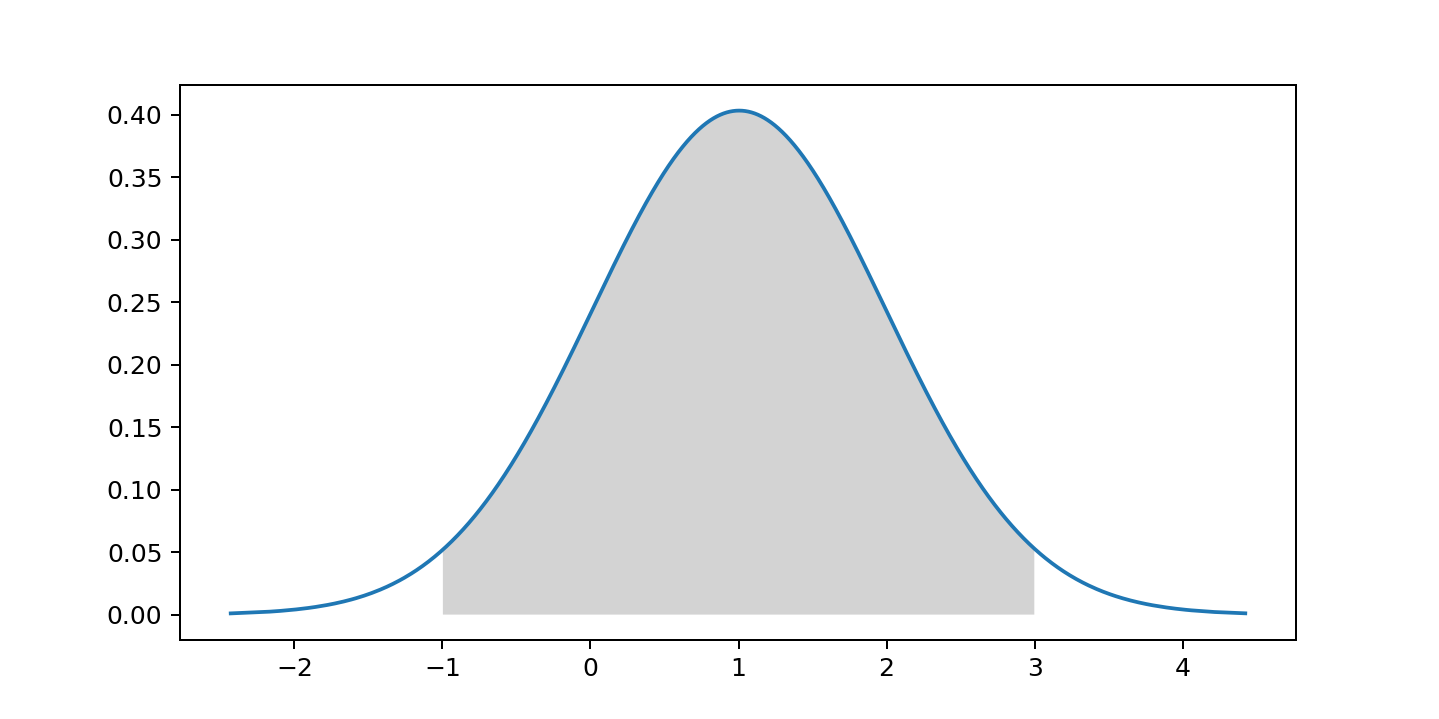

In [24]:
from scipy.stats import truncnorm
import matplotlib.pyplot as plt
%matplotlib notebook

def get_truncated_normal(mean=1, sd=1, low=-3, upp=7):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)


X1 = sorted(get_truncated_normal().rvs(10000))
mean, std = stats.norm.fit(X1, loc=0)
pdf_norm = stats.norm.pdf(X1, mean, std)


fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(X1, pdf_norm)

ax.fill_between(X1, 0, pdf_norm, 
                where=(np.array(X1)>-1) & (np.array(X1)<=3), 
                facecolor='lightgrey')
# ax.fill_betweenx(pdf_norm, 2, x2=7, interpolate=True)

Note: This interval is only exact when the population distribution is normal. For large samples from other population distributions, the interval is approximately correct by the Central Limit Theorem.

### What is confidence level $1 - \alpha$?

Confidence level is the chance that the statistic value of your interest lies within the interval. A common choice of confidence level include 

## Practical Application - Bayes Approximation

# Non-Parametric Methods

Very robust under normality too.

Non-parametric tests (as Wilcoxon-Mann-Whitney) do not rely on a specific distiribution, but implicitly rely on equal variances: under H0 are all samples from the same population.

# Normality testing

take a test on the distribution, e.g. Kolmogorov-Smirnov-test. After that you know whether you have a normal or not. then you need to test neither skewness nor curtosis.

The values for asymmetry and kurtosis between -2 and +2 are considered acceptable in order to prove normal univariate distribution (George & Mallery, 2010)

# F-test

For non-normal data, the distribution of the sample variance may deviate substantially from a χ2 distribution. However, if the sample size is large, Slutsky's theorem implies that the distribution of the sample variance has little effect on the distribution of the test statistic.

# Hypothesis Testing

 For the unequal variance t test, the null hypothesis is that the two population means are the same but the two population variances may differ. If the P value is large, you don't reject that null hypothesis, so conclude that the evidence does not persuade you that the two population means are different, even though you assume the two populations have (or may have) different standard deviations. What a strange set of assumptions. What would it mean for two populations to have the same mean but different standard deviations? Why would you want to test for that? Swailowsky points out that this situation simply doesn't often come up in science (1). 

I think the unequal variance t test is more useful when you think about it as a way to create a confidence interval. Your prime goal is not to ask whether two populations differ, but to quantify how far apart the two means are. The unequal variance t test reports a confidence interval for the difference between two means that is usable even if the standard deviations differ.

Unqual variance t-test

https://www.graphpad.com/support/faqid/1568/

https://towardsdatascience.com/kolmogorov-smirnov-test-84c92fb4158d

There is an issue with Student’s T-Test, samples must be normal (shaped in a normal distribution). That is an issue for us because we do work a lot with Poisson distributions.

# Really good t-test article

https://www.investopedia.com/terms/t/t-test.asp

# Paired vs unpaired t-test

https://www.quora.com/What-is-the-difference-between-a-paired-and-unpaired-t-test


# Different Sample Sizes

https://stats.stackexchange.com/questions/31326/how-should-one-interpret-the-comparison-of-means-from-different-sample-sizes

 think of this by analogy. If you want to know the area of a rectangle, and the perimeter is fixed, then the area will be maximized if the length and width are equal (i.e., if the rectangle is a square). On the other hand, as the length and width diverge (as the rectangle becomes elongated), the area shrinks.
 

# Levene's test

It tests the null hypothesis that the population variances are equal (called homogeneity of variance or homoscedasticity)
 
# K.S. test

My instructor in this topic joked:
Kolmogorov-Smirnov is a test for sample size. 

It has no power in small samples, and intense power, with no particular sensible acceptance of deviations from normal, in large samples.

The Kolmogorov-Smirnov (KS) test is used in over 500 refereed papers each year in the astronomical literature.  It is a nonparametric hypothesis test that measures the probability that a chosen univariate dataset is drawn from the same parent population as a second dataset (the two-sample KS test) or a continuous model (the one-sample KS test).

It measures the greatest distance between the two CDF's. The underlying population distribution is assumed to be continuous.

https://asaip.psu.edu/Articles/beware-the-kolmogorov-smirnov-test

*Question:* How good is KS test if sample size is small?

even when valid to apply, it is often not very sensitive in establishing distances between two distributions, and a similar EDF-based test gives a better performance. 

https://stats.stackexchange.com/questions/57885/how-to-interpret-p-value-of-kolmogorov-smirnov-test-python

he k-s test returns a D statistic and a p-value corresponding to the D statistic. The D statistic is the absolute max distance (supremum) between the CDFs of the two samples. The closer this number is to 0 the more likely it is that the two samples were drawn from the same distribution. The p-value returned by the k-s test has the same interpretation as other p-values. You reject the null hypothesis that the two samples were drawn from the same distribution if the p-value is less than your significance level.

**Best when comparing two non-parametric samples**

But less powerful when comparing to reference distribution, like normal distribution.

Shapiro-Wilk is known to be bad with samples with many identical values.

# Non-normal distribution

Mann-Whitney U test, Bootstrapping, [lognormal](https://amstat.tandfonline.com/doi/full/10.1080/10691898.2005.11910638#.XQvVFtNKhQI), bayisean

CI of medians


Normality assumption of a t-test

Consider a large population from which you could take many different samples of a particular size. (In a particular study, you generally collect just one of these samples.)

The t-test assumes that the means of the different samples are normally distributed; it does not assume that the population is normally distributed.

By the central limit theorem, means of samples from a population with finite variance approach a normal distribution regardless of the distribution of the population. Rules of thumb say that the sample means are basically normally distributed as long as the sample size is at least 20 or 30. For a t-test to be valid on a sample of smaller size, the population distribution would have to be approximately normal.

https://stats.stackexchange.com/questions/9573/t-test-for-non-normal-when-n50

T-test is fine on non-normal data, as long as the deviation from normality isn't large. Visualize your distributions to test this.

The advice must be modified somewhat when the distributions are both strongly skewed and very discrete, such as Likert scale items where most of the observations are in one of the end categories. Then the Wilcoxon-Mann-Whitney isn’t necessarily a better choice than the t-test.

Nonparametric t-Tests
The Mann–Whitney U test is the true nonparametric counterpart of the t-test and gives the most accurate estimates of significance, especially when sample sizes are small and/or when the data do not approximate a normal distribution.

However, there is something familiar and comforting about using t-tests! When one has a large sample size (N ≫ 30) but the data are skewed, it is worth examining log- or square root-transformed values of the data to see if they become more quasinormal (see Chapter 7). If the data pass a test for normality (included in most statistical software), it is then OK to perform a t-test using the transformed datapoints.

When the normality assumption does not hold, a non-parametric alternative to the t-test can often have better statistical power.

In the presence of an outlier, the t-test is not robust. For example, for two independent samples when the data distributions are asymmetric (that is, the distributions are skewed) or the distributions have large tails, then the Wilcoxon rank-sum test (also known as the Mann–Whitney U test) can have three to four times higher power than the t-test.[14][15][16] The nonparametric counterpart to the paired samples t-test is the Wilcoxon signed-rank test for paired samples. For a discussion on choosing between the t-test and nonparametric alternatives, see Sawilowsky (2005

# Different distribution distances

https://statweb.stanford.edu/~souravc/Lecture2.pdf

# Normality testing in extremely large sample sizes

https://stats.stackexchange.com/questions/2492/is-normality-testing-essentially-useless

The question normality tests answer: Is there convincing evidence of any deviation from the Gaussian ideal? With moderately large real data sets, the answer is almost always yes.

The question scientists often expect the normality test to answer: Do the data deviate enough from the Gaussian ideal to "forbid" use of a test that assumes a Gaussian distribution? Scientists often want the normality test to be the referee that decides when to abandon conventional (ANOVA, etc.) tests and instead analyze transformed data or use a rank-based nonparametric test or a resampling or bootstrap approach. For this purpose, normality tests are not very useful.

**Use skewness or kurtosis as a to test normality instead**

t can be verified using simulations that this is true for small 𝑛 as well. Thus Student's t-test is sensitive to skewness but relatively robust against heavy tails, and it is reasonable to use a test for normality that is directed towards skew alternatives before applying the t-test.

As a rule of thumb (not a law of nature), inference about means is sensitive to skewness and inference about variances is sensitive to kurtosis. - **you can use bootstrap in conjuction with normality test to get threshold value of good kurtosis and skewness**

On large samples, things like the T-test and ANOVA are pretty robust to non-normality.

The t-test assumes that the means of the different samples are normally distributed; it does not assume that the population is normally distributed.

By the central limit theorem, means of samples from a population with finite variance approach a normal distribution regardless of the distribution of the population. 

A confidence interval's width is due entirely to sampling error. As the sample size approaches the entire population, the width of the confidence interval approaches zero.

### Examples

Example
Suppose a student measuring the boiling temperature of a certain liquid observes the readings (in degrees Celsius) 102.5, 101.7, 103.1, 100.9, 100.5, and 102.2 on 6 different samples of the liquid. He calculates the sample mean to be 101.82. If he knows that the standard deviation for this procedure is 1.2 degrees, what is the confidence interval for the population mean at a 95% confidence level?

In other words, the student wishes to estimate the true mean boiling temperature of the liquid using the results of his measurements. If the measurements follow a normal distribution, then the sample mean will have the distribution N(,). Since the sample size is 6, the standard deviation of the sample mean is equal to 1.2/sqrt(6) = 0.49.

In [5]:
from scipy import stats
import numpy as np

a = [4,3,6,4,1,2,3,4]

stats.norm.interval(0.95, loc=np.mean(a), scale=np.std(a)/np.sqrt(len(a)))


(2.39885356840566, 4.35114643159434)

In [7]:
import numpy as np, scipy.stats as st

st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))

(2.11600213750892, 4.63399786249108)

In [ ]:
Many statistical techniques assume that sample data is normally distributed or Gaussian-like (Ex: t-distribution), and different techniques should be considered for non-normal data set.

## Similarity of distributions

https://stats.stackexchange.com/questions/77888/similarity-between-two-sets-of-random-values


## Smart Gas Lift

gas lift - use external high pressure gas, well has gas in it, but not enough. Inject in through the casing, tubing, and lift hydrocarbons up with the gas. High pressure compression makes the lifespan of machine short. 

Inject too little gas - don't lift enough. Doesn't flow all the way
Inject too much gas - you are gonna lift it all, but you add extra friction, and you waste gas that you can sell.

GOR affects how much gas you need to inject.

Based on experience, opt injection rate seems to always round about 500, 600, 700 mcfd. 

Key features
- self-optimization, maximizing runtime. We have 95% runtime, but others have 60-70% runtime.
- you can't manually determin BHP, but the algo does it automatically with iterations.

# Mahalanobis distance

https://stats.stackexchange.com/questions/62092/bottom-to-top-explanation-of-the-mahalanobis-distance

*Distribution score* depends on the type of distribution (Ex: normal, lognormal, chi-squared, weibull), and the equations for *standard error* depends on the type of statistic (Ex: mean, proportion, std, variance). The sample data is assumed to be normally distributed, allowing you to use <a href="#">z-score</a> to lookup values related to any confidence level (Ex: 99%, 95%, 90%). Since you are trying to compute confidence interval of a mean ($\overline{x}$), you use $SE_{\overline{x}} = s\,/\sqrt{N}$ to compute standard error for a mean.